### Importing required libraries

In [35]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import  display
from   pylab                           import  rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [36]:
df = pd.read_csv('oil.csv',parse_dates=['date'],dayfirst=True)
df.head()

,date,value
0,2010-01-01,8.2
1,2010-02-01,8.4
2,2010-03-01,8.5
3,2010-04-01,8.7
4,2010-05-01,8.7


In [37]:
df.tail()

,date,value
87,2017-04-01,9.98
88,2017-05-01,10.05
89,2017-06-01,10.06
90,2017-07-01,10.10
91,2017-08-01,10.14


In [38]:
df=df.set_index('date')

### Plotting time series

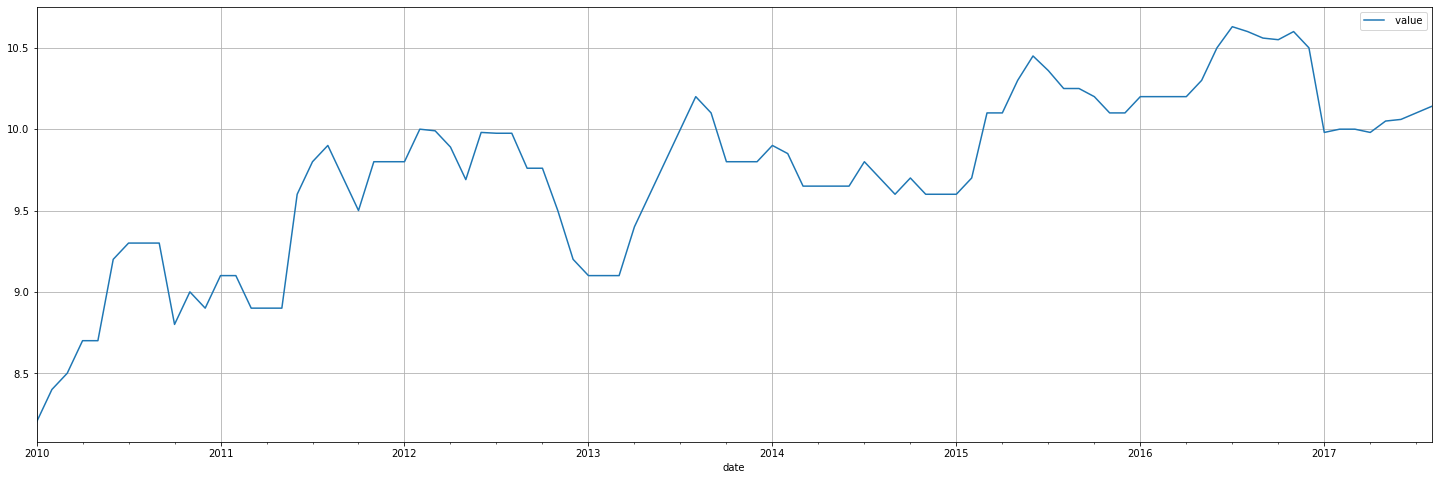

In [39]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [40]:
df

,value
date,
2010-01-01,8.20
2010-02-01,8.40
2010-03-01,8.50
2010-04-01,8.70
2010-05-01,8.70
...,...
2017-04-01,9.98
2017-05-01,10.05
2017-06-01,10.06


In [ ]:
#The datetime() class requires three parameters to create a date: year, month, day.

In [41]:
train_end=datetime(2017,1,1)
test_end=datetime(2017,8,1)

In [42]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [43]:
print('Train')
display(train)
print('Test')
display(test)

Train


,value
date,
2010-01-01,8.20
2010-02-01,8.40
2010-03-01,8.50
2010-04-01,8.70
2010-05-01,8.70
...,...
2016-09-01,10.56
2016-10-01,10.55
2016-11-01,10.60


Test


,value
date,
2017-02-01,10.00
2017-03-01,10.00
2017-04-01,9.98
2017-05-01,10.05
2017-06-01,10.06
2017-07-01,10.10
2017-08-01,10.14


# Simple Exponential Smoothing

In [54]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

#### lets train the model for different 𝛼 values

In [55]:
model_SES_fit1 = model_SES.fit(smoothing_level=0.9,optimized=False)

In [56]:
model_SES_fit1.summary()

Dep. Variable:,value,No. Observations:,85
Model:,SimpleExpSmoothing,SSE,3.046
Optimized:,False,AIC,-278.957
Trend:,None,BIC,-274.072
Seasonal:,None,AICC,-278.457
Seasonal Periods:,None,Date:,"Sun, 19 Sep 2021"
Box-Cox:,False,Time:,11:05:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
initial_level,8.2400000,l.0,False


#### Predicting forecast using trained models

In [57]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

In [58]:
SES_predict1

2017-02-01    10.032951
2017-03-01    10.032951
2017-04-01    10.032951
2017-05-01    10.032951
2017-06-01    10.032951
2017-07-01    10.032951
2017-08-01    10.032951
Freq: MS, dtype: float64

#### Plotting time searies and forecasts 

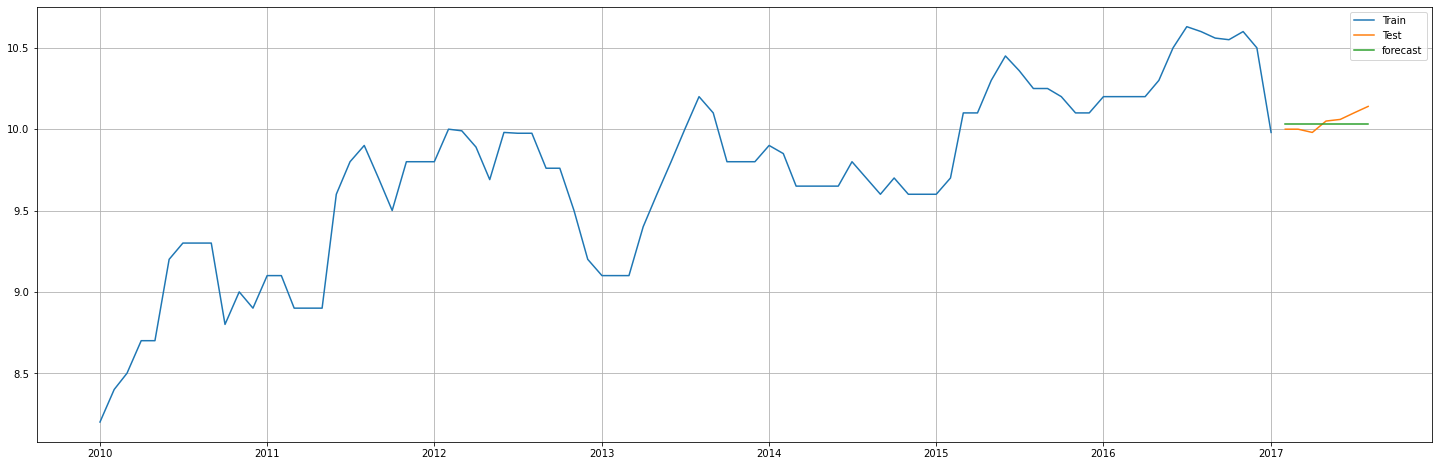

In [59]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

#### Root Mean Square Error for simple forecasting model

In [60]:
mean_squared_error(test.values,SES_predict1.values,squared=False)

0.05600081169486431

#### Defining Mean Absolute Percentage error

In [61]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [62]:
MAPE(test.values,SES_predict1.values)

0.47823817432533733

In [ ]:
test.values

# END